In [ ]:
Библиотека PIL - Python Imaging Library
В библиотеке содержатся общие средства для обработки изображений, в том числе изменение размера, кадрирование, 
поворот, преобразование цветов и т.д.

Библиотека Matplotlib - содержит средства изображения

Библиотека NumPy - библиотека научных вычислений, много функций линейной алгебры

Библиотека SciPy - библиотека научных вычислений для различных задач вычислительной математики

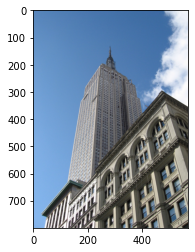

In [5]:
# открытие файла с изображением и прорисовка
from PIL import Image
from pylab import *

im=array(Image.open('empire.jpg'))
imshow(im)
show()

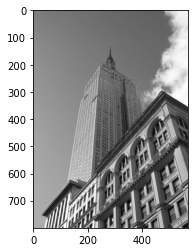

In [7]:
# перевод изображения в полутоновый режим
from PIL import Image
from pylab import *

im=array(Image.open('empire.jpg').convert('L'))
imshow(im)
show()

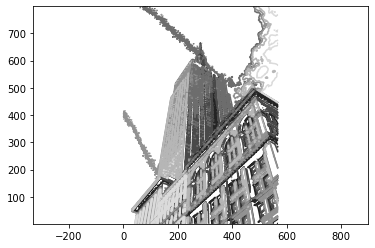

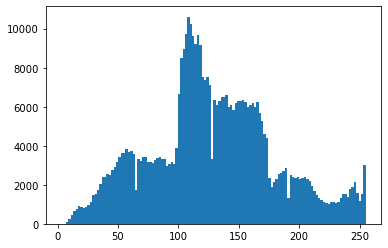

In [9]:
# изолинии и гистограмма изображения

from PIL import Image
from pylab import *

im=array(Image.open('empire.jpg').convert('L'))
figure()
gray()
contour(im,origin='image')
axis('equal')
figure()
hist(im.flatten(),128)
show()

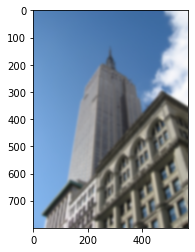

In [10]:
#размытие изображения - гаусовский фильтр G=1/2\pi\sigma * e^(-(x^2+y^2)/*(2\sigma^2))
from PIL import Image
from pylab import *
from scipy.ndimage import filters

im=array(Image.open('empire.jpg'))
im2 = zeros(im.shape)
for i in range(3):
  im2[:,:,i]=filters.gaussian_filter(im[:,:,i],4) # второй параметр - sigma
im2=array(im2,'uint8')
figure()
imshow(im2)
show()

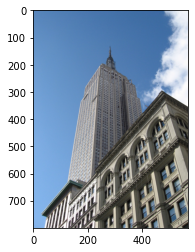

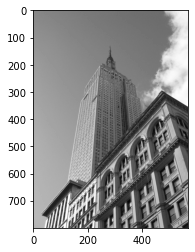

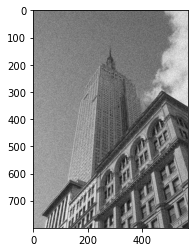

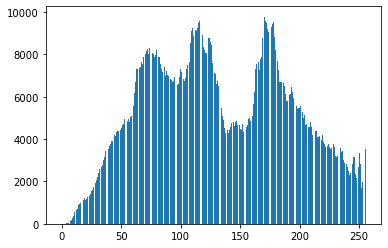

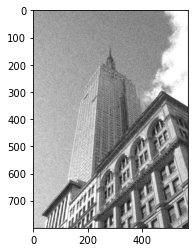

In [65]:
# без библиотек, используя минимальные алгеброические средства
from PIL import Image
from pylab import *

im=array(Image.open('empire.jpg'))

figure()
imshow(im)
show()

# перевод в полутоновое изображение
im1 = zeros((im.shape[0], im.shape[1]), np.float64)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im1[i,j]=mean(im[i,j,:])
imshow(im1)
show()

# добавление случайного шума
import random

im2 = zeros((im.shape[0], im.shape[1]), np.float64)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if(random.random()<0.5):
            im2[i,j]=im1[i,j]+random.gauss(50,5)
        else:
            im2[i,j]=im1[i,j]
imshow(im2)
show()

# построение гистограммы
x = [i for i in range(256)]
y = zeros(256)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        y[im[i,j]]+=1
figure()
bar(x,y)

# проведение размытия изображения с помощью фильтра Гаусса
import math

def filter(K_size, sigma, im):
    H, W = im.shape
    pad = K_size // 2
    out = zeros((H + pad * 2, W + pad * 2), np.float64)
    out[pad: pad + H, pad: pad + W] = im2.copy().astype(np.float64)

    K = zeros((K_size, K_size), np.float64)
    for x in range(-pad, -pad + K_size):
        for y in range(-pad, -pad + K_size):
            K[y + pad, x + pad] = exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * pi * sigma * sigma)
    K /= K.sum()
 
    tmp = out.copy()
  
    for y in range(H):
        for x in range(W):
            out[pad + y, pad + x] = sum(K * tmp[y: y + K_size, x: x + K_size])
    out = clip(out, 0, 255)
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)
    return out

figure()
imshow(filter(3,10,im2))
show()
